In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_excel('datos.xlsx', sheet_name='Hoja1', header=0)

dataset


,13.666667
0,19.666667
1,29.000000
2,19.666667
3,32.666667
4,17.000000
...,...
60,8.333333
61,25.333333
62,23.000000
63,13.666667


In [3]:
frecuencia = dataset.iloc[:, 0].value_counts().reset_index()
frecuencia.columns = ['Valores', 'Conteo']
frecuencia


,Valores,Conteo
0,29.000000,4
1,0.666667,3
2,19.666667,2
3,23.000000,2
4,9.333333,2
5,13.666667,2
6,13.000000,2
7,8.333333,2
8,29.333333,2
9,16.000000,2


In [4]:
if len(frecuencia) > 15:

    min_val = frecuencia['Valores'].min()
    max_val = frecuencia['Valores'].max()
    intervalos = np.linspace(min_val, max_val, 16)  

    dataset['Intervalos'] = pd.cut(dataset.iloc[:, 0], bins=intervalos, include_lowest=True)
    frecuencia = dataset['Intervalos'].value_counts().sort_index().reset_index()
    frecuencia.columns = ['Intervalos', 'Frecuencia_absoluta']
else:
    frecuencia.columns = ['Valores', 'Frecuencia_absoluta']


frecuencia['Frecuencia_acumulada_absoluta'] = frecuencia['Frecuencia_absoluta'].cumsum()

suma_acumulada = frecuencia['Frecuencia_absoluta'].sum()
frecuencia['Frecuencia_relativa'] = frecuencia['Frecuencia_absoluta'] / suma_acumulada


frecuencia['Frecuencia_acumulada_relativa'] = frecuencia['Frecuencia_relativa'].cumsum()

frecuencia

,Intervalos,Frecuencia_absoluta,Frecuencia_acumulada_absoluta,Frecuencia_relativa,Frecuencia_acumulada_relativa
0,"(0.666, 2.822]",5,5,0.076923,0.076923
1,"(2.822, 4.978]",1,6,0.015385,0.092308
2,"(4.978, 7.133]",3,9,0.046154,0.138462
3,"(7.133, 9.289]",4,13,0.061538,0.200000
4,"(9.289, 11.444]",6,19,0.092308,0.292308
5,"(11.444, 13.6]",3,22,0.046154,0.338462
6,"(13.6, 15.756]",5,27,0.076923,0.415385
7,"(15.756, 17.911]",6,33,0.092308,0.507692
8,"(17.911, 20.067]",4,37,0.061538,0.569231
9,"(20.067, 22.222]",1,38,0.015385,0.584615


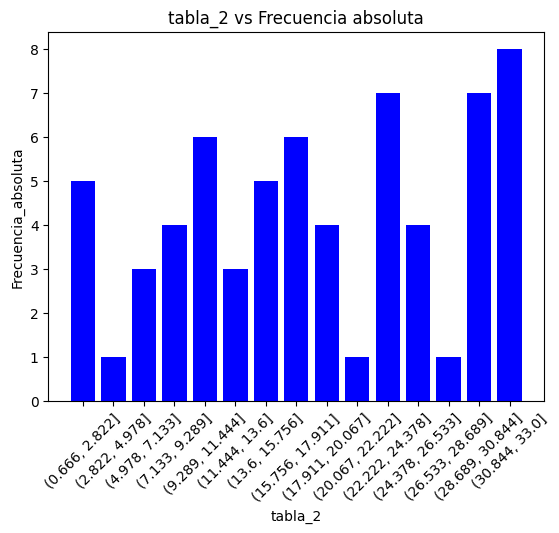

In [6]:
fig, ax = plt.subplots()
plt.title('tabla_2 vs Frecuencia absoluta')
plt.xlabel('tabla_2')
plt.ylabel('Frecuencia_absoluta')
ax.bar(frecuencia['Intervalos'].astype(str), frecuencia['Frecuencia_absoluta'], color='blue')
plt.xticks(rotation=45)
plt.show()

In [46]:
# fig, ax = plt.subplots()
# plt.title('Tabla 1 vs Frecuencia relativa')
# plt.xlabel('Frecuencia relativa')
# plt.ylabel('Tabla 1')
# ax.barh(frecuencia[13.666666666666666].astype(str), frecuencia['Frecuencia_relativa'], color='blue')
# plt.xticks(rotation=45)
# plt.grid(True, axis='x')
# plt.show()


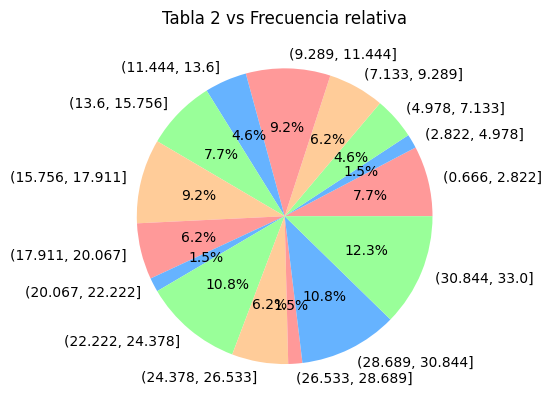

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.title('Tabla 2 vs Frecuencia relativa')

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax.pie(frecuencia['Frecuencia_relativa'], labels=frecuencia['Intervalos'].astype(str), autopct='%1.1f%%', colors=colors)

plt.show()


In [48]:
media = dataset.iloc[:, 0].mean()
mediana = dataset.iloc[:, 0].median()
minimo = dataset.iloc[:, 0].min()
maximo = dataset.iloc[:, 0].max()
moda = dataset.iloc[:, 0].mode()[0]
varianza = dataset.iloc[:, 0].var()

print("La media de la tabla es:  : ", media)
print("La mediana de la tablz es  : ", mediana)
print("La altura tabla es  : ", minimo)
print("La altura tabla es  : ", maximo)
print("La moda tabla es  : ", moda)
print("La varianza tabla es : ", varianza)


La media de la tabla es:  :  18.16923076923077
La mediana de la tablz es  :  17.666666666666668
La altura tabla es  :  0.6666666666666666
La altura tabla es  :  33.0
La moda tabla es  :  29.0
La varianza tabla es :  92.54209401709402


En este estudio de análisis estadístico utilizando técnicas de machine learning, se exploraron la frecuencia absoluta y relativa de los datos. Cuando se encontraron más de 15 valores únicos, se aplicaron intervalos para simplificar la visualización. Se crearon gráficos de barras y de pastel para representar las distribuciones de frecuencia de manera efectiva. Además, se calcularon y analizaron medidas de tendencia central como la media, moda, mediana, máximo y mínimo, proporcionando una visión completa del comportamiento de los datos analizados.